<a href="https://colab.research.google.com/github/Berkay86/DeepPerson/blob/main/S%C4%B1n%C4%B1fland%C4%B1rma2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string
from numpy import array
from keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer


In [46]:
resturantreviews = pd.read_csv("sentiment.csv")
resturantreviews.isnull().values.any()
resturantreviews.shape

(20001, 13)

In [47]:
resturantreviews.head()

,Unnamed: 0,Date,ID,url,username,source,location,tweet,num_of_likes,num_of_retweet,Processed_Tweets,Polarity,Sentiment
0,0,2022-12-20 20:33:11+00:00,1605300301011030017,https://twitter.com/Angelotralala/status/16053...,Angelotralala,Twitter Web App,NaN,@_OmarAg @AsfandY32733432 @FrankKhalidUK Argen...,0,0,argentina had world cup before messi came alon...,0.183333,Positive
1,1,2022-12-20 20:33:11+00:00,1605300299270197248,https://twitter.com/Yemmie_/status/16053002992...,Yemmie_,Twitter for iPhone,Where the money resides 💰,Ronaldo and Piers didn’t think the timing of t...,0,0,ronaldo and pier didn ’ t think the timing of ...,-0.150000,Negative
2,2,2022-12-20 20:33:10+00:00,1605300296636190720,https://twitter.com/danieltyree/status/1605300...,danieltyree,Twitter Web App,"Sacramento, CA",@tariqpanja Hate to see it. He had an incredib...,0,0,hate to see it he had an incredible world cup ...,-0.100000,Negative
3,3,2022-12-20 20:33:10+00:00,1605300295437029376,https://twitter.com/fIowerly/status/1605300295...,fIowerly,Twitter for Android,sara sheher 20,MY MAN is celebrating a world cup. yours is po...,0,0,my man is celebrating a world cup yours is pos...,0.000000,NaN
4,4,2022-12-20 20:33:10+00:00,1605300295424409600,https://twitter.com/uw4ht/status/1605300295424...,uw4ht,Twitter for Android,NaN,@EveeLaurynn Women are not the end result in t...,0,0,woman are not the end result in this world cup...,0.255000,Positive


In [48]:
resturantreviews["tweet"][3]

'MY MAN is celebrating a world cup. yours is posting pics with a kids choice awards. we are not the same'

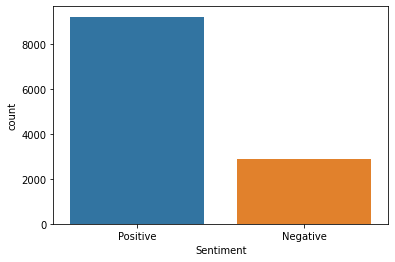

In [49]:
import seaborn as sns
sns.countplot(x='Sentiment', data=resturantreviews)
plt.show()

In [50]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [51]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [52]:
X = []
sentences = list(resturantreviews['tweet'])
for sen1 in sentences:
    X.append(preprocess_text(str(sen1)))

In [53]:
y = resturantreviews['Sentiment']
y = np.array(list(map(lambda x: 1 if x=="Positive" else 0, y)))
y

array([1, 0, 0, ..., 1, 1, 0])

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [55]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [56]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [60]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [62]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [63]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [64]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          3697300   
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 1)                 10001     
                                                                 
Total params: 3,707,301
Trainable params: 10,001
Non-trainable params: 3,697,300
_________________________________________________________________
None


In [65]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)


Epoch 1/6
100/100 [==============================] - 2s 8ms/step - loss: 0.6277 - acc: 0.6662 - val_loss: 0.5808 - val_acc: 0.7016
Epoch 2/6
100/100 [==============================] - 1s 6ms/step - loss: 0.5659 - acc: 0.7177 - val_loss: 0.5617 - val_acc: 0.7138
Epoch 3/6
100/100 [==============================] - 1s 7ms/step - loss: 0.5339 - acc: 0.7425 - val_loss: 0.5493 - val_acc: 0.7319
Epoch 4/6
100/100 [==============================] - 1s 7ms/step - loss: 0.5096 - acc: 0.7606 - val_loss: 0.5507 - val_acc: 0.7244
Epoch 5/6
100/100 [==============================] - 1s 6ms/step - loss: 0.4933 - acc: 0.7748 - val_loss: 0.5476 - val_acc: 0.7428
Epoch 6/6
100/100 [==============================] - 1s 6ms/step - loss: 0.4795 - acc: 0.7823 - val_loss: 0.5384 - val_acc: 0.7466


In [66]:
score = model.evaluate(X_test, y_test, verbose=1)

126/126 [==============================] - 0s 3ms/step - loss: 0.5663 - acc: 0.7168


In [67]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.5663252472877502
Test Accuracy: 0.7168207764625549


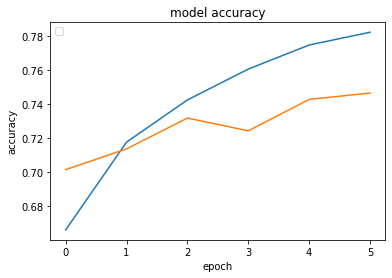

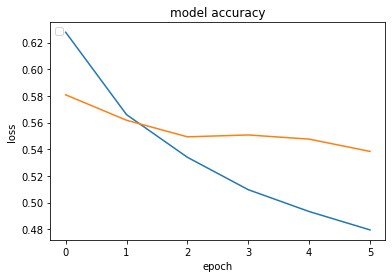

In [68]:
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

LSTM EVRİŞİMLİ SİNİR AĞLARI SINIFLANDIRMA

In [69]:
from keras.layers import Conv1D
model = Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [70]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          3697300   
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3,761,557
Trainable params: 64,257
Non-trainable params: 3,697,300
_________________________________________________________________
None


In [72]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)
score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/10
100/100 [==============================] - 10s 103ms/step - loss: 0.2082 - acc: 0.9353 - val_loss: 0.3375 - val_acc: 0.8541
Epoch 2/10
100/100 [==============================] - 13s 128ms/step - loss: 0.1806 - acc: 0.9503 - val_loss: 0.3437 - val_acc: 0.8487
Epoch 3/10
100/100 [==============================] - 10s 101ms/step - loss: 0.1542 - acc: 0.9646 - val_loss: 0.3340 - val_acc: 0.8519
Epoch 4/10
100/100 [==============================] - 10s 102ms/step - loss: 0.1347 - acc: 0.9723 - val_loss: 0.3310 - val_acc: 0.8541
Epoch 5/10
100/100 [==============================] - 10s 102ms/step - loss: 0.1145 - acc: 0.9809 - val_loss: 0.3315 - val_acc: 0.8591
Epoch 6/10
100/100 [==============================] - 10s 105ms/step - loss: 0.0974 - acc: 0.9860 - val_loss: 0.3298 - val_acc: 0.8619
Epoch 7/10
100/100 [==============================] - 14s 136ms/step - loss: 0.0856 - acc: 0.9887 - val_loss: 0.3336 - val_acc: 0.8594
Epoch 8/10
100/100 [==============================] - 1

In [73]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.3738393187522888
Test Accuracy: 0.8492876887321472


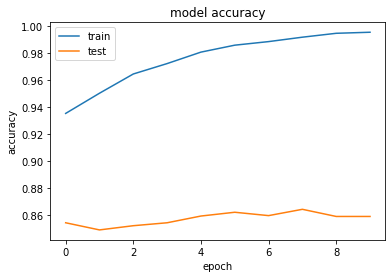

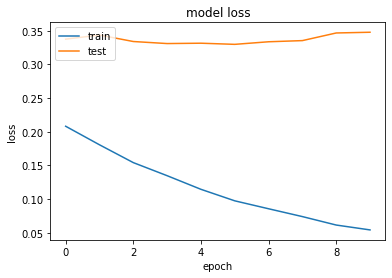

In [74]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

TEKRARLAYAN SİNİR AĞI MODELİ İLE METİN SINIFLANDIRMA

In [75]:
from tensorflow.keras.layers import LSTM
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(LSTM(128))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [76]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          3697300   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3,814,677
Trainable params: 117,377
Non-trainable params: 3,697,300
_________________________________________________________________
None


In [77]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)
score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/6
100/100 [==============================] - 40s 377ms/step - loss: 0.6506 - acc: 0.5982 - val_loss: 0.5943 - val_acc: 0.6569
Epoch 2/6
100/100 [==============================] - 34s 339ms/step - loss: 0.5578 - acc: 0.7110 - val_loss: 0.4942 - val_acc: 0.7622
Epoch 3/6
100/100 [==============================] - 34s 339ms/step - loss: 0.5138 - acc: 0.7463 - val_loss: 0.4994 - val_acc: 0.7878
Epoch 4/6
100/100 [==============================] - 34s 341ms/step - loss: 0.4802 - acc: 0.7676 - val_loss: 0.4920 - val_acc: 0.7900
Epoch 5/6
100/100 [==============================] - 34s 339ms/step - loss: 0.4279 - acc: 0.8037 - val_loss: 0.4289 - val_acc: 0.8128
Epoch 6/6
126/126 [==============================] - 8s 59ms/step - loss: 0.4206 - acc: 0.8055


In [78]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.4206136465072632
Test Accuracy: 0.8055486083030701


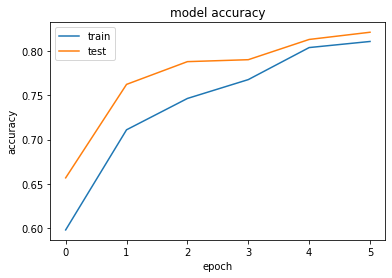

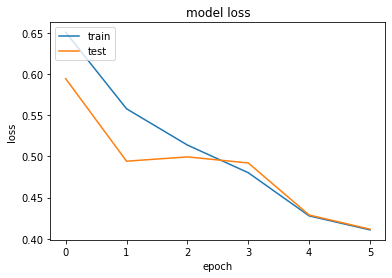

In [79]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [91]:
instance = X[185]
print(instance)

Idk feel like if she wasn going to perform the song at the World Cup then she should have just not been featured 


In [92]:
instance = tokenizer.texts_to_sequences(instance)

flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]

instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)

model.predict(instance)

1/1 [==============================] - 0s 26ms/step


array([[0.75302196]], dtype=float32)

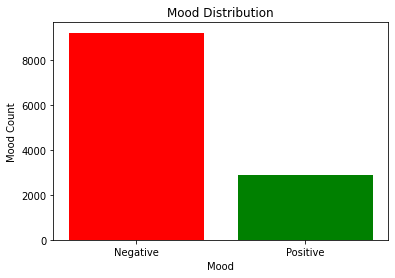

In [85]:
Mood = resturantreviews['Sentiment'].value_counts()
index = [1,2]
plt.bar(index,Mood,color=['r','g'])
plt.xticks(index,['Negative','Positive'])
plt.xlabel('Mood')
plt.ylabel('Mood Count')
plt.title('Mood Distribution')
plt.show()